<a href="https://colab.research.google.com/github/jeydion/sliderule_dsi_inferential_statistics_exercise_3/blob/master/sliderule_dsi_inferential_statistics_exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

from statsmodels.distributions.empirical_distribution import ECDF

In [0]:
# read in readmissions data provided
url = 'https://raw.githubusercontent.com/jeydion/sliderule_dsi_inferential_statistics_exercise_3/master/cms_hospital_readmissions.csv'
hospital_read_df = pd.read_csv(url)

****
## Preliminary Analysis

In [0]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int).copy()
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

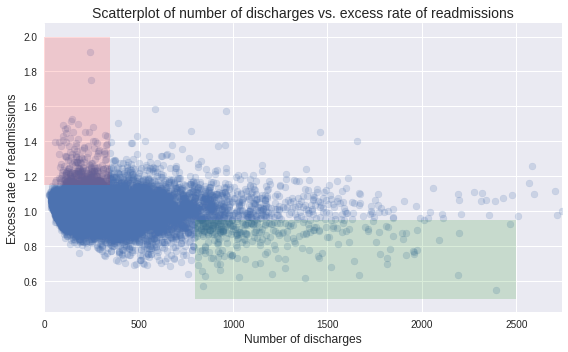

In [70]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [0]:
# Your turn

<h3>A.</h3> <p>The scatter plot above does show a decent comparison between the two variables. However, there seems to be a big "chunk" of data around the 0.8 - 1.2 range of excessive readmissions that is hard to decipher what is going on exactly. It would be better to split the information further by hospital types (perhaps grouped by discharge size) in order to get a better picture of the data.</p>  

<h3>B.</h3>
<ol>
  <li>H0: Hospitals with a higher amount of discharges have the same exessive readmission ratio as hospitals with a smaller amount of discharges  <br>H1: The rate of excessive readmissions ratio is not equal for hospitals..
  </li>
  <li>
 The hospitals are split into two groups; small hospitals have number of discharges less than 100 with the rest of the hospitals being categorized under large hospitals. Based on EDA the large hospitals have a fairly normal distribution with the mean excessive readmissions ratio is 1.006 and standard deviation of 0.1. The small hospitals are slighly more skewed with a mean of 1.02  with a standard deviation of 0.06. It seems that though the small hospitals have a higher expected readmission rate the standard deviation is smaller resulting in a smaller range.<br>
  The p-value=0.0 for 100,000 permutations. This means that the observed difference of 0.016 is never a=observed in the permutations. This rejects the null hypothesis and shows the excessive readmission rate between the two groups of hospitals is statisifically significant.
  </li>
  <li> Since the p-value is less than $\alpha$ = .01, the results are statistically significant.
  </li>
  <li> Statistical significance refers to the limit that is imposed on statistical analysis to find the probability of a certain instance taking place. Since this value is usually very low (for this exercise is it 0.01), statistical significance can include a wide range of relevance. Practical significance would rely on the measures that can be taken to alter the significance of results. Relating to this example, what actual protocols could be implemented at small hospitals to bring the excessive readmission rate down or atleast closer to that of large hospitals.
  </li>
  <li> The advantage of this plot it reflects the summary statistics relatively well as well as illustrates the negative correlation between number of discharges and excessive readmission rate.  The disadvantage comes from the difficulty in interpreting the information. It is difficult to see the difference in the outliers in the excess readmission rate. Also the shaded area doesn't correspond with any typical summary statistic. The boxes are within 1.5 times the mean to illuminate the outliers (all outliers are within the boxes). <br>
    The new scatter plot fixes the problems with the previous plot while maintaining its integrity. Now the distribution of excessive readmission rates can clearly be seen between two groups of hospitals with most data points congrugating around the mean and the spread of the standard deviation is easily seen. Also the outliers are well illustrated since they are no longer lumped in with the rest of the data. Log scale was used since the large hospital group includes such a wide range of hospitals. This helps keep the data in a concise space for easy analysis.
  </li>
    </ol>

In [87]:
#Clean data
df = hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 2 columns):
Number of Discharges        16860 non-null object
Excess Readmission Ratio    13731 non-null float64
dtypes: float64(1), object(1)
memory usage: 263.5+ KB


In [88]:
# Remove zero discharge hospitals
df = df[df['Number of Discharges'] != 'Not Available']
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])
df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


In [0]:
# Split between different amounts of discharges
small_hospitals = df[df['Number of Discharges'] <= 100]
large_hospitals = df[df['Number of Discharges'] > 100]

In [93]:
#Find mean and standard deviation of excessive discharge rates
print('Small Hospitals')
print(small_hospitals['Excess Readmission Ratio'].describe())
print('Standard Deviation: {:3f} '.format(np.std(small_hospitals['Excess Readmission Ratio'])))
print('Large Hospitals')
print(large_hospitals['Excess Readmission Ratio'].describe())
print('Standard Deviation: {:3f} '.format(np.std(large_hospitals['Excess Readmission Ratio'])))

Small Hospitals
count    1223.000000
mean        1.022088
std         0.058154
min         0.893500
25%         0.983800
50%         1.016700
75%         1.052750
max         1.495300
Name: Excess Readmission Ratio, dtype: float64
Standard Deviation: 0.058131 
Large Hospitals
count    10274.000000
mean         1.005768
std          0.095046
min          0.549500
25%          0.947725
50%          1.000800
75%          1.059600
max          1.909500
Name: Excess Readmission Ratio, dtype: float64
Standard Deviation: 0.095041 


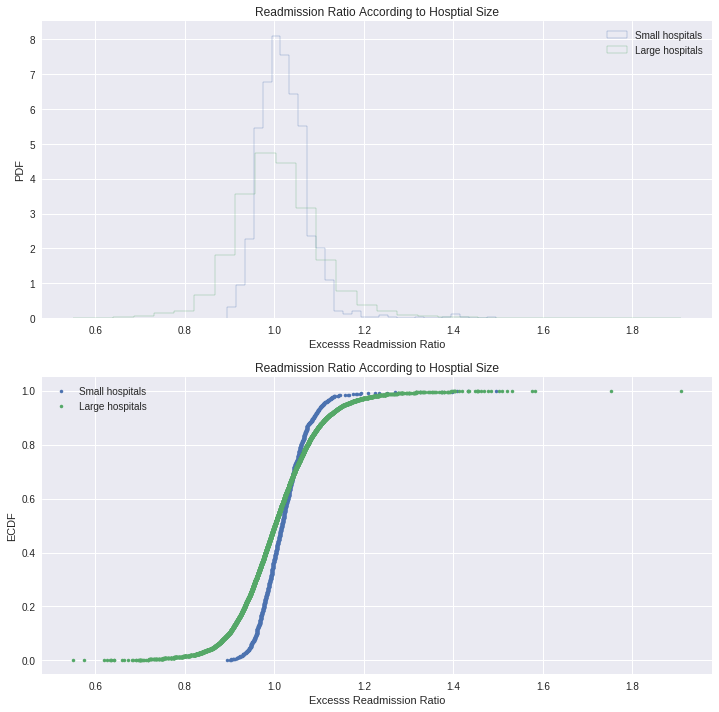

In [104]:
# Compute ecdfs
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)
    return x, y

x_small, y_small = ecdf(small_hospitals['Excess Readmission Ratio'])
x_large, y_large = ecdf(large_hospitals['Excess Readmission Ratio'])

# Examine differences visually
fig = plt.figure(figsize=(12, 12))
_ = plt.subplot(2,1,1)
_ = plt.hist(small_hospitals['Excess Readmission Ratio'], bins=30, density=True, histtype='step')
_ = plt.hist(large_hospitals['Excess Readmission Ratio'], bins=30, density=True, histtype='step')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.ylabel('PDF')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Small hospitals', 'Large hospitals'))

_ = plt.subplot(2,1,2)
_ = plt.plot(x_small, y_small, marker='.', linestyle='none')
_ = plt.plot(x_large, y_large, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Small hospitals', 'Large hospitals'))

In [109]:
# Q3
# Define test statistic 
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Compute test statistic for observed data
diff_stat = diff_of_means(small_hospitals['Excess Readmission Ratio'], large_hospitals['Excess Readmission Ratio'])

# Draw permutation replicates
perm_replicates = np.empty(100000)
for i in range(len(perm_replicates)): 
    # Permute the data
    both = np.concatenate((small_hospitals['Excess Readmission Ratio'], large_hospitals['Excess Readmission Ratio']))
    both_perm = np.random.permutation(both)
    perm_small = both_perm[len(large_hospitals):]
    perm_large = both_perm[:len(large_hospitals)]
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_small, perm_large)

# Compute the p-value
p_value = np.sum(abs(perm_replicates) >= abs(diff_stat)) / len(perm_replicates)

print('observed difference:',diff_stat)
print('p-value:',p_value)

('observed difference:', 0.01632073298728476)
('p-value:', 0)


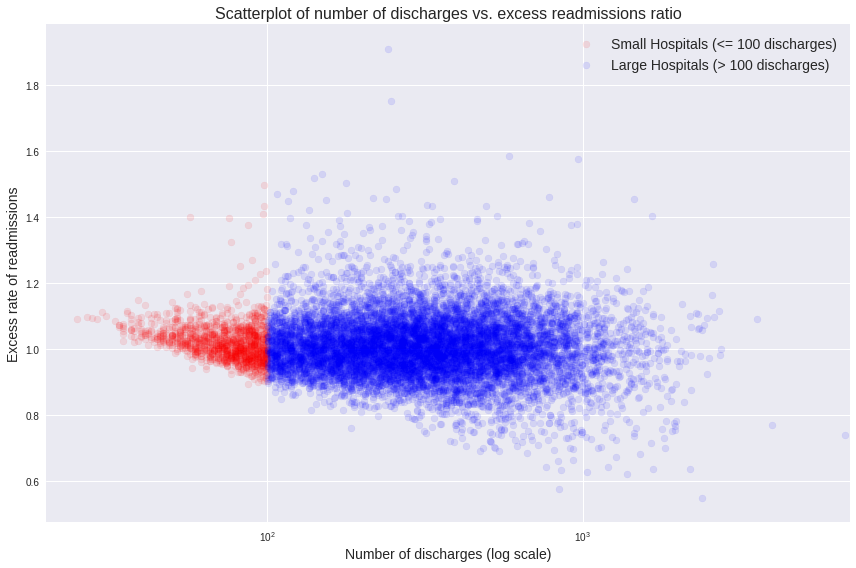

In [117]:
# Q5
x_small = [a for a in small_hospitals['Number of Discharges']]
y_small = list(small_hospitals['Excess Readmission Ratio'])

x_large = [a for a in large_hospitals['Number of Discharges']]
y_large = list(large_hospitals['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(12,8))
_ = ax.scatter(x_small, y_small, color='red', alpha=0.1)
_ = ax.scatter(x_large, y_large, color='blue', alpha=0.1)


_ = ax.set_xlim([20, 7000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Number of discharges (log scale)', fontsize=14)
_ = ax.set_ylabel('Excess rate of readmissions', fontsize=14)
_ = ax.set_title('Scatterplot of number of discharges vs. excess readmissions ratio', fontsize=16)
_ = ax.legend(['Small Hospitals (<= 100 discharges)', 'Large Hospitals (> 100 discharges)'], fontsize=14)

ax.grid(True)
fig.tight_layout()